In [1]:
import pandas as pd
from google.colab import drive


drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
data_townhouse = pd.read_csv('/content/drive/MyDrive/Isolation_Forest_Data/data_townhouse.csv', encoding='utf-8')
data_townhouse.info()
data_townhouse

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56074 entries, 0 to 56073
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Floor                            56074 non-null  float64
 1   Building_Age                     56074 non-null  int64  
 2   JS_BA                            56074 non-null  float64
 3   Population                       56074 non-null  int64  
 4   IR                               56074 non-null  float64
 5   UR                               56074 non-null  float64
 6   LC_index                         56074 non-null  float64
 7   CA_index                         56074 non-null  float64
 8   TC_index                         56074 non-null  float64
 9   SDT_index                        56074 non-null  float64
 10  HSP_index                        56074 non-null  float64
 11  Crime_Rates                      56074 non-null  float64
 12  latitude          

,Floor,Building_Age,JS_BA,Population,IR,UR,LC_index,CA_index,TC_index,SDT_index,...,Region_성동구,Region_성북구,Region_송파구,Region_양천구,Region_영등포구,Region_용산구,Region_은평구,Region_종로구,Region_중구,Region_중랑구
0,4.0,10,64.64,557563,2.75,3.002441,75.067017,81.791313,79.254181,109.957306,...,0,0,0,0,0,0,0,0,0,0
1,4.0,1,45.63,486546,2.75,3.002953,75.048462,81.747910,79.239304,109.957306,...,0,0,0,0,0,0,0,0,0,0
2,1.0,17,49.46,486546,2.75,2.992941,75.048462,81.747910,79.239304,109.957306,...,0,0,0,0,0,0,0,0,0,0
3,5.0,1,39.23,486546,2.75,3.002953,75.048462,81.747910,79.239304,109.957306,...,0,0,0,0,0,0,0,0,0,0
4,5.0,1,41.95,486546,2.75,3.002953,75.048462,81.747910,79.239304,109.957306,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56069,4.0,3,51.72,404484,3.50,3.129286,102.687721,106.933830,111.051254,76.240776,...,0,0,0,0,0,0,0,0,0,0
56070,2.0,15,13.16,429142,3.50,3.169702,102.709267,106.936493,111.039436,76.247322,...,0,1,0,0,0,0,0,0,0,0
56071,4.0,7,29.85,438353,3.50,3.161310,102.718582,106.936493,111.055389,76.240776,...,0,0,0,1,0,0,0,0,0,0
56072,4.0,0,29.78,217288,3.50,3.270631,102.712120,106.937012,111.059784,76.240776,...,0,0,0,0,0,1,0,0,0,0


In [3]:
columns_to_drop = ['CA_index', 'TC_index']
data_townhouse = data_townhouse.drop(columns = columns_to_drop)
data_townhouse

,Floor,Building_Age,JS_BA,Population,IR,UR,LC_index,SDT_index,HSP_index,Crime_Rates,...,Region_성동구,Region_성북구,Region_송파구,Region_양천구,Region_영등포구,Region_용산구,Region_은평구,Region_종로구,Region_중구,Region_중랑구
0,4.0,10,64.64,557563,2.75,3.002441,75.067017,109.957306,73.161324,1.386371,...,0,0,0,0,0,0,0,0,0,0
1,4.0,1,45.63,486546,2.75,3.002953,75.048462,109.957306,73.140366,0.947923,...,0,0,0,0,0,0,0,0,0,0
2,1.0,17,49.46,486546,2.75,2.992941,75.048462,109.957306,73.140366,0.947923,...,0,0,0,0,0,0,0,0,0,0
3,5.0,1,39.23,486546,2.75,3.002953,75.048462,109.957306,73.140366,0.947923,...,0,0,0,0,0,0,0,0,0,0
4,5.0,1,41.95,486546,2.75,3.002953,75.048462,109.957306,73.140366,0.947923,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56069,4.0,3,51.72,404484,3.50,3.129286,102.687721,76.240776,121.578835,1.116515,...,0,0,0,0,0,0,0,0,0,0
56070,2.0,15,13.16,429142,3.50,3.169702,102.709267,76.247322,121.569580,0.728011,...,0,1,0,0,0,0,0,0,0,0
56071,4.0,7,29.85,438353,3.50,3.161310,102.718582,76.240776,121.569580,0.799288,...,0,0,0,1,0,0,0,0,0,0
56072,4.0,0,29.78,217288,3.50,3.270631,102.712120,76.240776,121.578651,1.418952,...,0,0,0,0,0,1,0,0,0,0


Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 64 is smaller than n_iter=300. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3228
[LightGBM] [Info] Number of data points in the train set: 44859, number of used features: 43
[LightGBM] [Info] Start training from score 27148.279339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best parameters found:  {'reg_lambda': 1, 'reg_alpha': 1, 'num_leaves': 128, 'n_estimators': 1500, 'max_depth': 15, 'learning_rate': 0.1}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3228
[LightGBM] [Info] Number of data points in the train set: 44859, number of used features: 43
[LightGBM] [Info] Start training from score 27148.279339
[LightGBM] [Wa

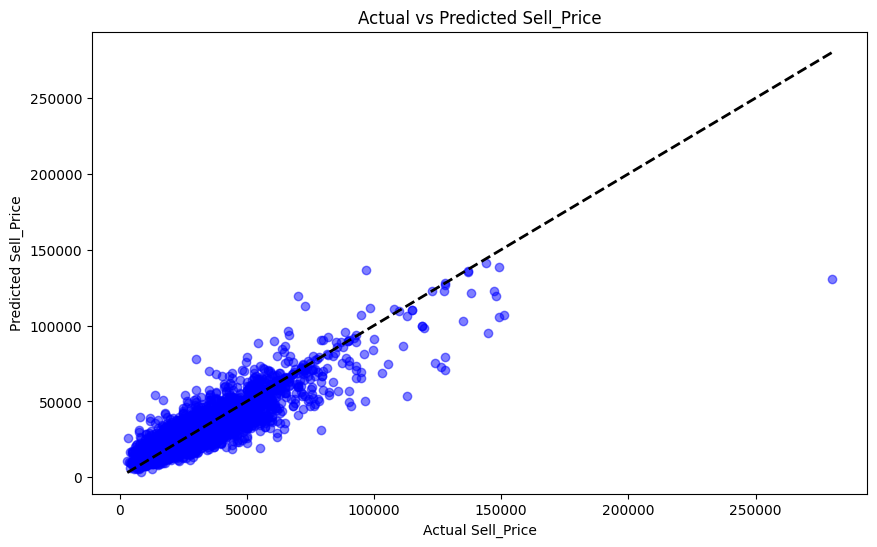

In [7]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset (assuming you have already loaded it into a DataFrame called 'df')
# Replace 'df' with your actual DataFrame name
df = data_townhouse

# Split the data into features (X) and target variable (y)
X = df.drop("Sell_Price", axis=1)
y = df["Sell_Price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=283)

# Set hyperparameters for LightGBM model (adjust these based on your requirements)
params = {
    'objective': 'regression',
    # Add other hyperparameters as per your requirement
}

# Create LightGBM dataset for training only
train_data = lgb.Dataset(X_train, label=y_train)

# Perform RandomizedSearchCV for hyperparameter tuning
model_lgb = lgb.LGBMRegressor()
random_grid = {
    'n_estimators': (300, 1500),
    'learning_rate': (0.01, 0.1),
    'num_leaves': (32, 128),
    'max_depth': (-1, 15),
    'reg_alpha': (0, 1),
    'reg_lambda': (0, 1)

}
rscv = RandomizedSearchCV(estimator=model_lgb,
                          param_distributions=random_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_iter=300,
                          n_jobs=-1,
                          verbose=1,
                          random_state=742)

rscv.fit(X_train, y_train)

print("Best parameters found: ", rscv.best_params_)

# Train the model using LightGBM with best parameters
model = lgb.LGBMRegressor(**params, **rscv.best_params_)
model.fit(X_train, y_train)

# Make predictions on the testing set using trained model
y_pred = model.predict(X_test)

# Calculate evaluation metrics: MAE (Mean Absolute Error), RMSE (Root Mean Squared Error),
# MAPE (Mean Absolute Percentage Error), R-Squared

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-Squared:", r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sell_Price')
plt.ylabel('Predicted Sell_Price')
plt.title('Actual vs Predicted Sell_Price')
plt.show()


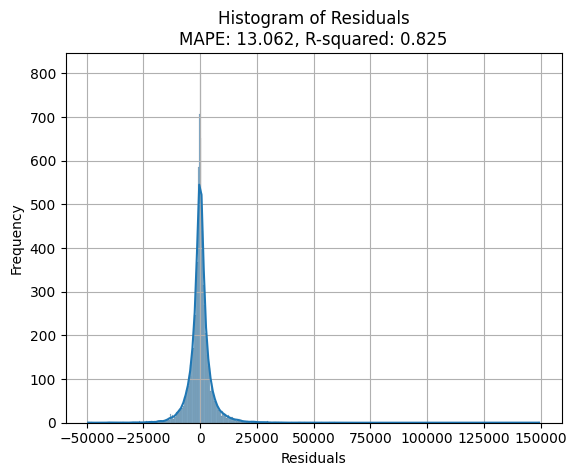

In [11]:
import seaborn as sns


# Create a histogram of residuals with MAE and MAPE
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals\nMAPE: {:.3f}, R-squared: {:.3f}".format(mape, r2))
plt.grid(True)

# Save the trained model

In [ ]:
import lightgbm as lgb
import joblib

# Train the LightGBM model as you did before
# ...

# Save the trained model to a file
model_filename = "lgb_model.pkl"
joblib.dump(model, model_filename)

# You can also save the column names of your features if needed
column_names_filename = "column_names.pkl"
joblib.dump(X.columns, column_names_filename)


# Load the trained model and make actual predictions

In [ ]:
import lightgbm as lgb
import joblib
import pandas as pd

# Load the saved model
model_filename = "lgb_model.pkl"
model = joblib.load(model_filename)

# Load the column names if needed
column_names_filename = "column_names.pkl"
column_names = joblib.load(column_names_filename)

# Create a new DataFrame with your independent features for prediction
new_data = pd.DataFrame({
    'Feature1': [value1],
    'Feature2': [value2],
    # Add more features as needed
})

# Make predictions using the loaded model
predictions = model.predict(new_data)

# The 'predictions' variable now contains the predicted 'Sell_Price' values for the new data
print(predictions)


In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming you have already loaded it into a DataFrame called 'df')
# Replace 'df' with your actual DataFrame name
df = data_townhouse

# Split the data into features (X) and target variable (y)
X = df.drop("Sell_Price", axis=1)
y = df["Sell_Price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=283)

# Set hyperparameters for XGBoost model (adjust these based on your requirements)
params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    # Add other hyperparameters as per your requirement
}

# Perform RandomizedSearchCV for hyperparameter tuning
model_xgb = xgb.XGBRegressor()
random_grid = {
    'n_estimators': (300, 1500),
    'learning_rate': (0.01, 0.1),
    'max_depth': (3, 10),
    'min_child_weight': (1, 10),
    'gamma': (0, 1),
    'subsample': (0.6, 1),
    'colsample_bytree': (0.6, 1),
    'reg_alpha': (0, 1),
    'reg_lambda': (0, 1)
}

rscv = RandomizedSearchCV(estimator=model_xgb,
                          param_distributions=random_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_iter=100,
                          n_jobs=-1,
                          verbose=1,
                          random_state=742)

rscv.fit(X_train, y_train)

print("Best parameters found: ", rscv.best_params_)

# Train the model using XGBoost with best parameters
model = xgb.XGBRegressor(**params, **rscv.best_params_)
model.fit(X_train, y_train)

# Make predictions on the testing set using trained model
y_pred = model.predict(X_test)

# Calculate evaluation metrics: MAE (Mean Absolute Error), RMSE (Root Mean Squared Error),
# MAPE (Mean Absolute Percentage Error), R-Squared

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-Squared:", r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sell_Price')
plt.ylabel('Predicted Sell_Price')
plt.title('Actual vs Predicted Sell_Price')
plt.show()

# Create a histogram of residuals with MAE and MAPE
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals\nMAPE: {:.3f}, R-squared: {:.3f}".format(mape, r2))
plt.grid(True)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
